In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates 
%matplotlib inline
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv', parse_dates=['Date'])
df['Total Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)


In [ ]:
#WW cases 
worldwide_df = df.groupby(['Date']).sum()

w = worldwide_df.plot(figsize=(8,5))
w.set_xlabel('Date')
w.set_ylabel('# Cases WorldWide')
w.title.set_text('Insights')

plt.show() 

In [ ]:
ec_df = df[df['Country']=='Ecuador'].groupby(['Date']).sum()

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
ax.plot(worldwide_df[['Total Cases']], label='Total Cases')
ax.plot(ec_df[['Total Cases']], label='Ecuador')
ax.set_xlabel('Date')
ax.set_ylabel('# Total Cases')
ax.title.set_text('Ecuador Insights') 
plt.legend(loc='upper left') 
plt.show()


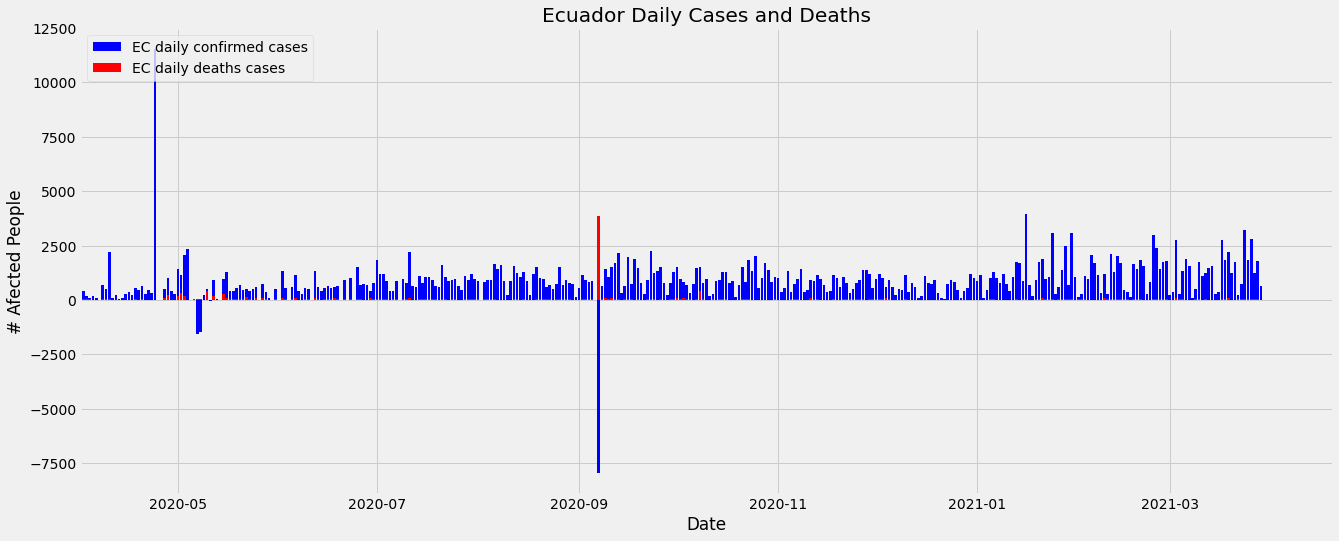

In [52]:
#Ecuador Daily cases and deaths

ec_df['Daily confirmed'] = ec_df['Confirmed'].sub(ec_df['Confirmed'].shift())
ec_df['Daily Deaths'] = ec_df['Deaths'].sub(ec_df['Deaths'].shift())

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax.bar(ec_df['Date'], ec_df['Daily confirmed'], color='b', label='EC daily confirmed cases')
ax.bar(ec_df['Date'], ec_df['Daily Deaths'], color='r', label='EC daily deaths cases')
ax.set_xlabel('Date')
ax.set_ylabel('# Afected People')
ax.title.set_text('Ecuador Daily Cases and Deaths')
plt.xlim(xmin='2020-04')

plt.legend(loc='upper left')
plt.show()